<a href="https://colab.research.google.com/github/Rudresh99/Thermal-Sensation-Prediction/blob/master/Thermal_Sensation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thermal Sensation Acceptability Prediction using Keras

![alt text](https://www.researchgate.net/profile/Mamdooh_Alwetaishi/publication/317109298/figure/fig8/AS:668532467585042@1536401969885/The-most-important-environmental-factors-affecting-thermal-comfort.jpg)

Thermal comfort is the condition of mind that expresses satisfaction with the thermal environment and is assessed by subjective evaluation. The human body can be viewed as a heat engine where food is the input energy. The human body will release excess heat into the environment, so the body can continue to operate.

# # Objective :-


# Predicting that wheather a human being is accepting the thermal sesation acceptability or not 



# 1). Mount Google Drive in the Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2). Importing all the Necessary Library for Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3). Loading Dataset from Google Drive to Notebook

In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/thermal data.csv',index_col='Data contributor')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Publication (Citation),Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,Age,Sex,Thermal sensation,Thermal sensation acceptability,Thermal preference,Air movement acceptability,Air movement preference,Thermal comfort,PMV,PPD,SET,Clo,Met,activity_10,activity_20,activity_30,activity_60,Air temperature (C),Air temperature (F),Ta_h (C),Ta_h (F),Ta_m (C),Ta_m (F),Ta_l (C),Ta_l (F),Operative temperature (C),Operative temperature (F),Radiant temperature (C),Radiant temperature (F),Globe temperature (C),Globe temperature (F),Tg_h (C),Tg_h (F),Tg_m (C),Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity preference,Humidity sensation,Air velocity (m/s),Air velocity (fpm),Velocity_h (m/s),Velocity_h (fpm),Velocity_m (m/s),Velocity_m (fpm),Velocity_l (m/s),Velocity_l (fpm),Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
Data contributor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Kwok Alison,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,Female,-0.5,1.0,warmer,1.0,no change,5,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,24.2,75.6,24.2,75.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,75.2,24.0,75.2,NaN,NaN,NaN,NaN,50.2,NaN,NaN,0.06,11.81,NaN,NaN,NaN,NaN,NaN,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
Kwok Alison,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,Female,-2.1,1.0,no change,1.0,no change,5,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,24.2,75.6,24.2,75.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,75.2,24.0,75.2,NaN,NaN,NaN,NaN,50.2,NaN,NaN,0.06,11.81,NaN,NaN,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
Kwok Alison,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,Male,0.5,1.0,no change,1.0,more,6,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN,24.2,75.6,24.2,75.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,75.2,24.0,75.2,NaN,NaN,NaN,NaN,50.2,NaN,NaN,0.06,11.81,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
Kwok Alison,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,14.0,Female,-2.5,0.0,no change,1.0,less,4,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN,24.2,75.6,24.2,75.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,75.2,24.0,75.2,NaN,NaN,NaN,NaN,50.2,NaN,NaN,0.06,11.81,NaN,NaN,NaN,NaN,NaN,NaN,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
Kwok Alison,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,Male,-0.5,1.0,no change,1.0,no change,6,NaN,NaN,NaN,0.34,NaN,NaN,NaN,NaN,NaN,24.2,75.6,24.2,75.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,75.2,24.0,75.2,NaN,NaN,NaN,NaN,50.2,NaN,NaN,0.06,11.81,NaN,NaN,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2


# 4). Data Pre-Processing of the Data for Modeling

In [4]:
data.describe()

,Year,Age,Thermal sensation,Thermal sensation acceptability,Air movement acceptability,PMV,PPD,SET,Clo,Met,activity_10,activity_20,activity_30,activity_60,Air temperature (C),Air temperature (F),Ta_h (C),Ta_h (F),Ta_m (C),Ta_l (C),Ta_l (F),Operative temperature (C),Operative temperature (F),Radiant temperature (C),Radiant temperature (F),Globe temperature (C),Globe temperature (F),Tg_h (C),Tg_h (F),Tg_m (C),Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity sensation,Air velocity (m/s),Air velocity (fpm),Velocity_h (m/s),Velocity_h (fpm),Velocity_m (m/s),Velocity_m (fpm),Velocity_l (m/s),Velocity_l (fpm),Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
count,107335.000000,43579.000000,104454.000000,62444.000000,16347.000000,66734.000000,66734.000000,66518.000000,99663.000000,90419.000000,8810.000000,9699.000000,8754.000000,9597.000000,99911.000000,99911.000000,28024.000000,28024.000000,31148.000000,10448.000000,10448.000000,37963.000000,37963.000000,32473.000000,32472.000000,26004.000000,26004.000000,53005.000000,53005.000000,25886.000000,25886.000000,23248.000000,23248.000000,97762.000000,12540.000000,89892.000000,89881.000000,21979.000000,21979.000000,28320.000000,28320.000000,10252.000000,10252.000000,20353.000000,24662.000000,5735.000000,13186.000000,22079.000000,11130.000000,8338.000000,79338.000000,79336.000000
mean,2002.010695,32.560173,0.167892,0.775078,0.785771,0.136790,20.962094,25.769629,0.673669,1.206626,1.184229,1.257274,1.258977,1.319214,24.496358,76.090540,24.569258,76.223719,24.220964,23.450124,74.207647,24.504233,76.105627,24.602735,76.283592,24.621170,76.316978,24.796730,76.631297,24.375786,75.874689,22.970135,73.341419,47.548068,0.096491,0.175384,34.406833,0.198810,38.992171,0.169033,33.231058,0.140220,27.571972,167.154852,65.219783,0.535658,0.472016,0.398750,0.357143,0.506716,17.439813,63.383538
std,8.821613,14.094305,1.241041,0.417534,0.410299,0.944571,22.812804,3.201344,0.287622,0.248939,0.262830,0.309673,0.324960,0.436808,3.782002,6.808186,3.314986,5.968314,4.182063,3.335375,6.004032,3.824202,6.881707,4.257815,7.666581,3.961457,7.130474,3.238273,5.829603,4.419894,7.956098,2.733099,4.920204,15.760944,1.061069,0.405937,79.630166,0.247892,48.811165,0.316110,62.246802,0.155037,30.543856,9.445020,12.883791,0.498770,0.499235,0.489652,0.479179,0.499985,9.936357,17.925840
min,1979.000000,6.000000,-3.000000,0.000000,0.000000,-3.000000,5.000000,6.550000,0.000000,0.650000,0.000000,0.426621,0.000000,0.699659,0.600000,33.100000,6.300000,43.300000,6.000000,5.000000,41.000000,5.100000,41.200000,1.200000,34.100000,0.500000,32.800000,6.000000,42.800000,3.000000,37.500000,5.900000,42.600000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.100000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.400000,-1.100000
25%,1995.000000,21.000000,-0.500000,1.000000,1.000000,-0.400000,6.000000,23.710000,0.490000,1.060000,1.000000,1.058020,1.058020,1.058020,22.300000,72.200000,22.800000,73.000000,22.200000,21.900000,71.400000,22.400000,72.300000,22.400000,72.400000,22.600000,72.600000,22.700000,72.900000,22.300000,72.200000,21.700000,71.000000,35.300000,0.000000,0.040000,7.870000,0.070000,13.780000,0.050000,9.840000,0.050000,10.040000,160.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,50.000000
50%,1999.000000,29.000000,0.000000,1.000000,1.000000,0.100000,11.000000,25.530000,0.630000,1.200000,1.058020,1.116838,1.126280,1.200000,23.900000,75.000000,24.100000,75.300000,23.600000,23.000000,73.500000,23.900000,74.900000,24.000000,75.100000,24.000000,75.200000,24.100000,75.400000,23.700000,74.700000,22.800000,73.000000,47.200000,0.000000,0.090000,17.720000,0.120000,24.300000,0.100000,19.700000,0.100000,18.900000,167.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,17.100000,62.700000
75%,2011.000000,43.000000,1.000000,1.000000,1.000000,0

In [5]:
data.drop(columns=['Publication (Citation)'],inplace=True)


In [6]:
data['Database'].unique()

array(['Database 2', 'Database 1'], dtype=object)

In [7]:
data['Year'].fillna(2002,inplace=True)
# data['Year'].isnull().sum()


In [8]:
t = np.mean(data['Age'])
data['Age'].fillna(t,inplace=True)
# data['Age'].isnull().sum()


In [9]:
data.replace(['Summer', 'Autumn', 'Winter', 'Spring', 'nan'], [1, 2, 3,4,5], inplace=True)

data['Season'].fillna(2,inplace=True)
# data['Season'].isnull().sum().


In [10]:
data['Thermal sensation'].isnull().sum()
data['Thermal sensation'].unique()
a = data['Thermal sensation'].mean()
data['Thermal sensation'].fillna(a,inplace=True)

In [11]:
data['Thermal sensation acceptability'].isnull().sum()
data['Thermal sensation acceptability'].fillna(1,inplace=True)


In [12]:
data['Air movement acceptability'].unique()
data['Air movement acceptability'].isnull().sum()
data['Air movement acceptability'].fillna(1,inplace=True)


# Koppen climate classification

The system divides the world into five climate zones based on criteria, usually temperature, which allows for different vegetation growth. Köppen’s map used different colors and shades to represent the different climate zones of the world. While most of the zones are organized based on the temperature of a region, Zone B focuses on the aridity of a region. The zones are as follows:

Zone A: tropical or equatorial zone (represented by blue colors on most maps)

Zone B: arid or dry zone (represented by red, pink, and orange colors on most maps)

Zone C: warm/mild temperate zone (represented by green colors on most maps)

Zone D: continental zone (represented by purple, violet, and light blue colors on most maps)

Zone E: polar zone (represented by gray colors on most maps)

Each zone is further subdivided based on temperature or dryness. For example, Zone A has three subdivisions: Zone Af has no dry season, Zone Am has a short dry season, and Zone Aw has a winter dry season. Zone B is divided into categories related to regions such as hot, arid deserts (Zone BWh); cold, arid deserts (Zone BWk); hot, arid steppes (Zone BSh); and cold, arid steppes (Zone BSk). Climate zones C and D are broken into categories based on when the dry seasons occur in the zones, as well as the coldness of the summer or the warmth of the winter. Zone E climates are separated into tundra regions (Zone ET) or snow and ice regions (Zone EF). Additionally, some modern revisions to the system include a sixth region, known as Zone H. This represents a highland climate located at mountainous elevations.

Köppen’s classification maps are still used by scientists and climatologists to this day. Although he published his first map in the early 1900s, Köppen continued to update it until his death in 1940. Subsequent climatologists, including Rudolf Geiger, updated versions of this map, which often include Geiger’s name as well. At the time of writing, a recent revision to this map was published in 2018.


In [13]:
data['Koppen climate classification'].unique()
climate = {'Cfa':1, 'Csb':2, 'Aw':3, 'BSh':4, 'Csa':5, 'Csc':6, 'Dwa':7, 'Af':8, 'Cfb':9, 'BWh':10,
       'BSk':11, 'Am':12, 'As':13, 'Cwa':14, 'Cwb':15, 'Dfb':16}
data['Koppen climate classification'] = data['Koppen climate classification'].map(climate)


![alt text](https://cdn.britannica.com/s:700x500/67/188767-050-DD04AF29/types-patterns-precipitation-vegetation-temperature-map-classification-1900.jpg)

In [14]:
col_conversion = LabelEncoder()
# data['Climate'].unique()
data['Climate'] = col_conversion.fit_transform(data['Climate'])
category = col_conversion.classes_
print("Category of Columns : ",category)

# data['Climate'].shape

Category of Columns :  ['Cold semi-arid' 'Cool-summer Mediterranean' 'Cool-summer mediterranean'
 'Hot desert' 'Hot semi-arid' 'Hot-summer Mediterranean'
 'Hot-summer mediterranean' 'Humid subtropical'
 'Monsoon-influenced hot-summer humid continental'
 'Monsoon-influenced humid subtropical' 'Oceanic' 'Subtropical highland'
 'Temperate oceanic' 'Tropical dry savanna' 'Tropical monsoon'
 'Tropical rainforest' 'Tropical wet savanna' 'Warm-summer Mediterranean'
 'Warm-summer humid continental']


![f](https://user-images.githubusercontent.com/52448964/89881603-577b9f00-dbe3-11ea-9810-f91747b766b7.png)


In [15]:
data['Country'].unique()

array(['Japan', 'USA', 'India', 'Iran', 'China', 'Philippines',
       'Australia', 'Malaysia', 'Slovakia', 'Denmark', 'Tunisia', 'UK',
       'France', 'Sweden', 'Portugal', 'Greece', 'Brazil', 'South Korea',
       'Italy', 'Belgium', 'Mexico', 'Germany', 'Nigeria', 'Singapore',
       'Thailand', 'Indonesia', 'Canada', 'Pakistan'], dtype=object)

In [16]:
g = LabelEncoder()
data['Country'] = g.fit_transform(data['Country'])


In [17]:
# data['Cooling startegy_building level'] = g.fit_transform(data['Cooling startegy_building level'])
data['Cooling startegy_building level'].unique()
data['Cooling startegy_building level'].fillna(1,inplace = True)
data['Cooling startegy_building level'].isnull().sum()

0

In [18]:
data['Cooling startegy_building level'].unique()
data.replace([1,'Air Conditioned', 'Naturally Ventilated', 'Mixed Mode', 
       'Mechanically Ventilated'], [1, 2, 3,4,5], inplace=True)


In [19]:
data['City'].fillna(0,inplace = True)
data['City'].unique()
data.replace(['Tokyo', 'Texas', 'Berkeley', 'Chennai', 'Hyderabad', 'Ilam',
       'San Francisco', 'Alameda', 'Philadelphia', 'Guangzhou',
       'Changsha', 'Yueyang', 'Harbin', 'Beijing', 'Chaozhou', 'Nanyang',
       'Makati', 'Sydney', 'Jaipur', 'Kota Kinabalu', 'Kuala Lumpur', 0,
       'Beverly Hills', 'Putra Jaya', 'Kinarut', 'Kuching', 'Bedong',
       'Bratislava', 'Elsinore', 'Gabes', 'Gafsa', 'El Kef', 'Sfax',
       'Tunis', 'Midland', 'London', 'Lyon', 'Gothenburg', 'Malmo',
       'Porto', 'Halmstad', 'Athens', 'Lisbon', 'Florianopolis',
       'BrasÌ_lia', 'Recife', 'Maceio', 'Seoul', 'Tsukuba', 'Lodi',
       'Varese', 'Imola', 'Shanghai', 'Liege', 'Mexicali', 'Hermosillo',
       'Colima', 'Culiacan ', 'MÌ©rida', 'Tezpur', 'Imphal', 'Shilong',
       'Ahmedabad', 'Bangalore', 'Delhi', 'Shimla', 'Bandar Abbas',
       'Karlsruhe', 'Bauchi', 'Stuttgart', 'Hampshire', 'Wollongong',
       'Goulburn', 'Singapore', 'Cardiff', 'Bangkok', 'Jakarta',
       'Montreal', 'Brisbane', 'Darwin', 'Melbourne', 'Ottawa', 'Karachi',
       'Multan', 'Peshawar', 'Quetta', 'Saidu Sharif', 'Oxford',
       'San Ramon', 'Palo Alto', 'Walnut Creek', 'Townsville',
       'Liverpool', 'St Helens', 'Chester', 'Grand Rapids', 'Auburn',
       'Kalgoorlie', 'Honolulu'], [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,
                                   48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,
                                   87,88,89,90,91,92,93,94,95,96,97,98,99], inplace=True)


In [20]:
data['Building type'].unique()
data['Building type'].fillna(6, inplace= True) 
data.replace(['Classroom', 'Office', 'Others', 'Multifamily housing',
       'Senior center',6], [1, 2, 3,4,5,6], inplace=True)



In [21]:
data['Cooling startegy_operation mode for MM buildings'].unique()
data['Cooling startegy_operation mode for MM buildings'].fillna(1,inplace = True)
data.replace([1,2,3,'Unknown'],[1,2,3,4],inplace=True)

In [22]:
# data.drop(columns=['Heating strategy_building level'],axis=1)
data['Heating strategy_building level'].unique()
data['Heating strategy_building level'].fillna(0,inplace=True)
data.replace([0,'Mechanical Heating'],[0,1],inplace=True)


In [23]:
data['Sex'].unique()
data['Sex'].isnull().sum()
data['Sex'].fillna(0,inplace=True)
data.replace([0,'Female','Male'],[0,0,1],inplace=True)



In [24]:
data['Thermal preference'].unique()
data['Thermal preference'].isnull().sum()
data['Thermal preference'].fillna(0,inplace=True)
data.replace(['warmer', 'no change', 'cooler', 0],[1,2,3,0],inplace=True)


In [25]:
data['Air movement preference'].unique()
data['Air movement preference'].fillna(0,inplace=True)
data.replace([2, 'more', 'less', 'nan'],[2,4,3,1],inplace=True)
data['Air movement preference'].shape
data['Air movement preference'].isnull().sum()


0

In [26]:
data['Thermal comfort'].unique()
data['Thermal comfort'].isnull().sum()
data['Thermal comfort'].fillna(0,inplace=True)
data.replace([5.0, 6, 4.0, 1, 3, 2, 4.5, 5.2, 2.5, 2.7, 2.2, 2.3, 2.8, 4.3, 2.4,
       4.2, 3.5, 0, 1.8, 'Na', '2.6', '5.1', '1.7', '3.4', '0.9', '4.3',
       '6', '5', '4', '2', '3', '1', 1.3, 1.5, ' '],[5.0, 6, 4.0, 1, 3, 2, 4.5, 5.2, 2.5, 2.7, 2.2, 2.3, 2.8, 4.3, 2.4,
       4.2, 3.5, 0, 1.8, 0, '2.6', '5.1', '1.7', '3.4', '0.9', '4.3',
       '6', '5', '4', '2', '3', '1', 1.3, 1.5, 0],inplace=True)



In [27]:
data['PMV'].isnull().sum()
data['PMV'].mean()
data['PMV'].fillna(1.0862311565319103,inplace=True)


In [28]:
data['PPD'].isnull().sum()
data['PPD'].mean()
data['PPD'].fillna(20.962094284773425,inplace=True)



In [29]:
data['SET'].isnull().sum()
data['SET'].mean()
data['SET'].fillna(25.769629,inplace=True)



In [30]:
data['Clo'].isnull().sum()
data['Clo'].mean()
data['Clo'].fillna(0.675876,inplace=True)


In [31]:
data['Met'].isnull().sum()
data['Met'].mean()
data['Met'].fillna(1.206626,inplace=True)



In [32]:
data.drop(columns=['Subject«s height (cm)','Subject«s weight (kg)','Blind (curtain)','Fan','Window','Door','Heater'],axis=1,inplace=True)
data.drop(['Database'],axis=1,inplace=True)


In [33]:
data['activity_10'].isnull().sum()
data['activity_10'].mean()
data['activity_10'].fillna(1.194218,inplace=True)

data['activity_20'].isnull().sum()
data['activity_20'].mean()
data['activity_20'].fillna(1.257274,inplace=True)

data['activity_30'].isnull().sum()
data['activity_30'].mean()
data['activity_30'].fillna(1.264003,inplace=True)

data['activity_60'].isnull().sum()
data['activity_60'].mean()
data['activity_60'].fillna(1.319214,inplace=True)



In [34]:
data['Air temperature (C)'].isnull().sum()
data['Air temperature (C)'].mean()
data['Air temperature (C)'].fillna(24.496358,inplace=True)

data['Air temperature (F)'].isnull().sum()
data['Air temperature (F)'].mean()
data['Air temperature (F)'].fillna(76.090540	,inplace=True)

data['Ta_h (C)'].isnull().sum()
data['Ta_h (C)'].mean()
data['Ta_h (C)'].fillna(24.569258,inplace=True)

data['Ta_h (F)'].isnull().sum()
data['Ta_h (F)'].mean()
data['Ta_h (F)'].fillna(76.223719	,inplace=True)

data['Ta_m (C)'].isnull().sum()
data['Ta_m (C)'].mean()
data['Ta_m (C)'].fillna(24.220964,inplace=True)

data['Ta_l (C)'].isnull().sum()
data['Ta_l (C)'].mean()
data['Ta_l (C)'].fillna(23.450124,inplace=True)

data['Ta_l (F)'].isnull().sum()
data['Ta_l (F)'].mean()
data['Ta_l (F)'].fillna(74.207647,inplace=True)

data['Operative temperature (C)'].isnull().sum()
data['Operative temperature (C)'].mean()
data['Operative temperature (C)'].fillna(24.504233,inplace=True)

data['Operative temperature (F)'].isnull().sum()
data['Operative temperature (F)'].mean()
data['Operative temperature (F)'].fillna(76.105627,inplace=True)

data['Radiant temperature (C)'].isnull().sum()
data['Radiant temperature (C)'].mean()
data['Radiant temperature (C)'].fillna(24.602735,inplace=True)

data['Radiant temperature (F)'].isnull().sum()
data['Radiant temperature (F)'].mean()
data['Radiant temperature (F)'].fillna(76.283592	,inplace=True)

data['Globe temperature (C)'].isnull().sum()
data['Globe temperature (C)'].mean()
data['Globe temperature (C)'].fillna(24.621170,inplace=True)

data['Globe temperature (F)'].isnull().sum()
data['Globe temperature (F)'].mean()
data['Globe temperature (F)'].fillna(76.316978	,inplace=True)



In [35]:
data.drop(columns=["Velocity_h (m/s)", "Velocity_h (fpm)",	"Velocity_m (m/s)",	"Velocity_m (fpm)",	"Velocity_l (m/s)",	"Velocity_l (fpm)"], axis=1, inplace=True)

In [36]:
data['Tg_h (C)'].isnull().sum()
data['Tg_h (C)'].mean()
data['Tg_h (C)'].fillna(24.796730,inplace=True)

data['Tg_h (F)'].isnull().sum()
data['Tg_h (F)'].mean()
data['Tg_h (F)'].fillna(76.631297,inplace=True)

data['Tg_m (C)'].isnull().sum()
data['Tg_m (C)'].mean()
data['Tg_m (C)'].fillna(24.375786,inplace=True)

data['Tg_m (F)'].isnull().sum()
data['Tg_m (F)'].mean()
data['Tg_m (F)'].fillna(75.874689,inplace=True)

data['Tg_l (C)'].isnull().sum()
data['Tg_l (C)'].mean()
data['Tg_l (C)'].fillna(22.970135,inplace=True)

data['Tg_l (F)'].isnull().sum()
data['Tg_l (F)'].mean()
data['Tg_l (F)'].fillna(73.341419,inplace=True)


In [37]:
data['Relative humidity (%)'].isnull().sum()
data['Relative humidity (%)'].mean()
data['Relative humidity (%)'].fillna(47.548293,inplace=True)

data['Humidity sensation'].isnull().sum()
data['Humidity sensation'].mean()
data['Humidity sensation'].fillna(11.470175,inplace=True)

data['Air velocity (m/s)'].isnull().sum()
data['Air velocity (m/s)'].mean()
data['Air velocity (m/s)'].fillna(0.847680,inplace=True)

data['Air velocity (fpm)'].isnull().sum()
data['Air velocity (fpm)'].mean()
data['Air velocity (fpm)'].fillna(34.932351,inplace=True)

data['Outdoor monthly air temperature (C)'].isnull().sum()
data['Outdoor monthly air temperature (C)'].mean()
data['Outdoor monthly air temperature (C)'].fillna(17.446746,inplace=True)

data['Outdoor monthly air temperature (F)'].isnull().sum()
data['Outdoor monthly air temperature (F)'].mean()
data['Outdoor monthly air temperature (F)'].fillna(63.383538,inplace=True)


In [38]:
data['Humidity preference'].unique()
data['Humidity preference'].fillna(0,inplace=True)
data.replace([0, 'drier', 2, 'more humid'],[0,1,2,3],inplace=True)


![alt text](https://cdn.britannica.com/01/53801-050-F463F06F/values-humidity.jpg)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107583 entries, Kwok Alison to Alison Kwok
Data columns (total 54 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Year                                              107583 non-null  float64
 1   Season                                            107583 non-null  float64
 2   Koppen climate classification                     107583 non-null  float64
 3   Climate                                           107583 non-null  float64
 4   City                                              107583 non-null  float64
 5   Country                                           107583 non-null  float64
 6   Building type                                     107583 non-null  float64
 7   Cooling startegy_building level                   107583 non-null  float64
 8   Cooling startegy_operation mode for MM buildings  107583 non-null  float64

# 5). Data Visualization 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(-170, -58, 'Created By : Rudresh Joshi')

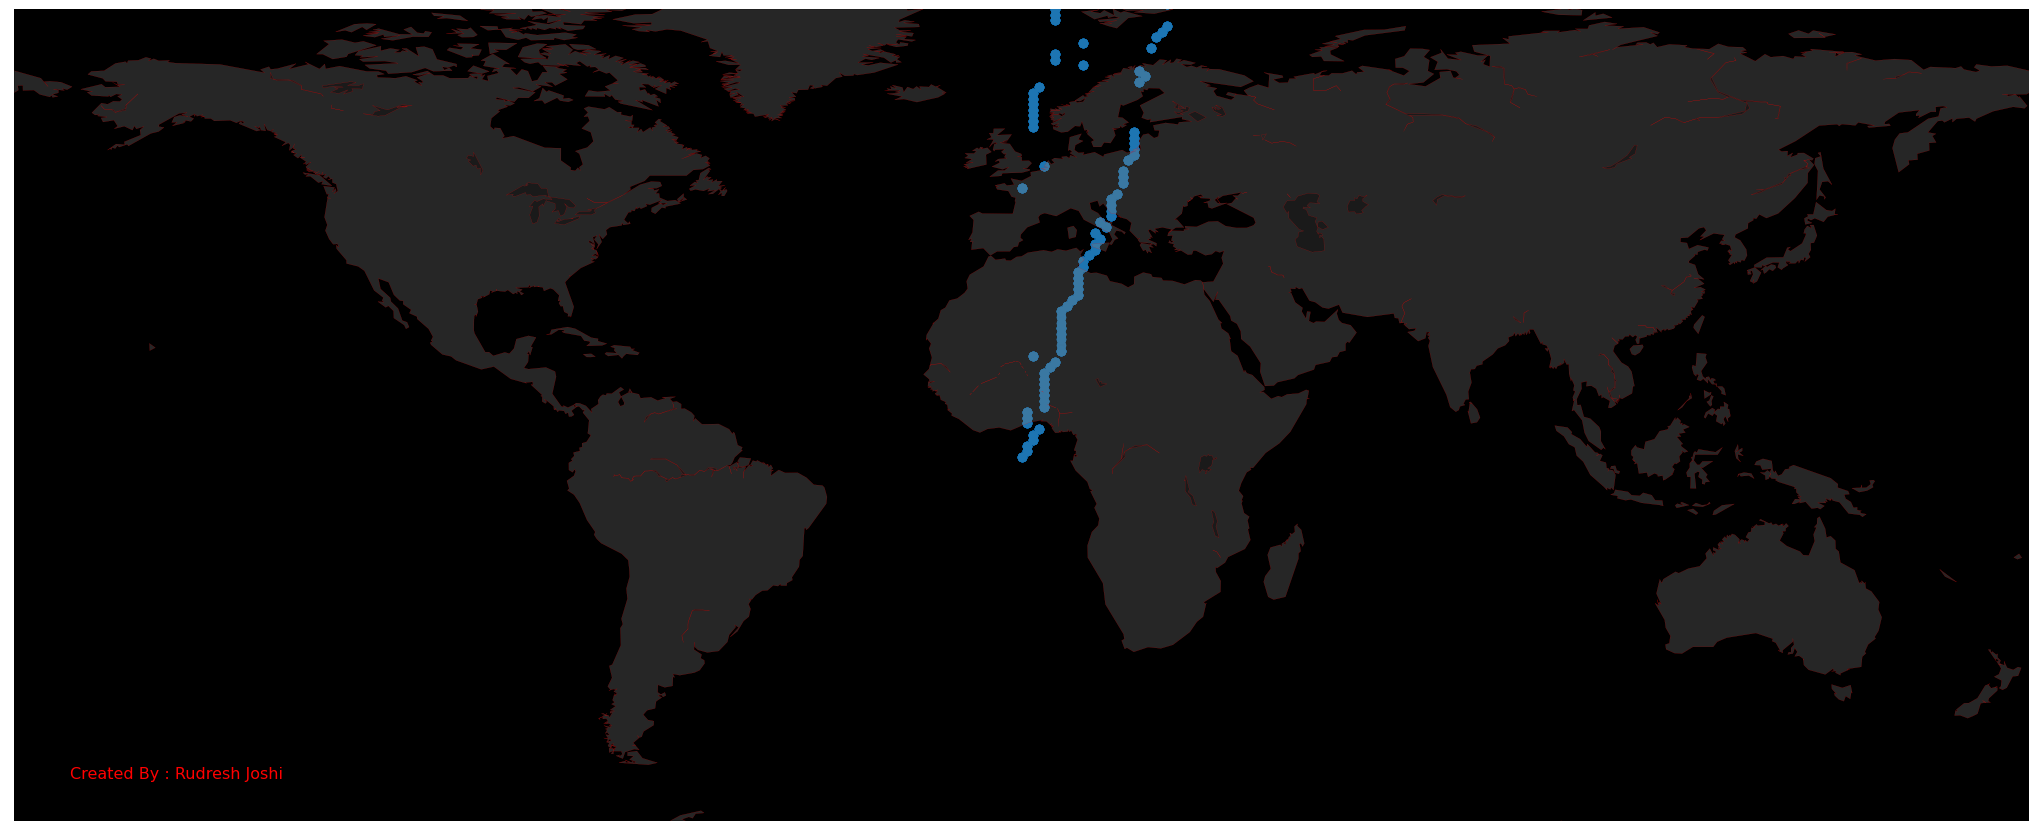

In [40]:
visuals = pd.read_csv('/content/drive/My Drive/Dataset/thermal data.csv')

visuals['City'].fillna('Indore',inplace=True)

# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='black', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="red")
 
# Add a point per position
m.scatter(visuals['Country'], visuals['City'], alpha=0.4, cmap="twilight_shifted_r")
 
# copyright and source data info
plt.text( -170, -58,'Created By : Rudresh Joshi', ha='left', va='bottom', size=12, color='red' )
 
# Save as png
# plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')



# 6). Seperating Data into Input and Output

In [41]:
X = data.drop(columns=['Ta_m (F)','Thermal comfort','Thermal sensation acceptability'])
y = data[['Thermal sensation acceptability']].values

# 7). Spliting Dataset into Training and Testing data

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 12)

# 8). Importing Advance Library Keras for the computational purpose

In [43]:
from keras.models import Sequential
from keras.layers import *

# Model Defining

In [44]:
model = Sequential()
model.add(Dense(100,input_dim=51,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5200      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 45,601
Trainable params: 45,601
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])

# 9). Now Fitting the Data into our model

In [46]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    shuffle=True,
    verbose=2,
    batch_size = 5

)

Epoch 1/5
17214/17214 - 21s - loss: 0.0000e+00 - accuracy: 0.8692
Epoch 2/5
17214/17214 - 21s - loss: 0.0000e+00 - accuracy: 0.8692
Epoch 3/5
17214/17214 - 22s - loss: 0.0000e+00 - accuracy: 0.8692
Epoch 4/5
17214/17214 - 21s - loss: 0.0000e+00 - accuracy: 0.8692
Epoch 5/5
17214/17214 - 21s - loss: 0.0000e+00 - accuracy: 0.8692


# 10). Now Making Prediction using our model

In [59]:
Prediction = model.predict(X_test)
Prediction = pd.DataFrame(Prediction)
final = std(Prediction)
# if Prediction=1:
#   print("Thermal Sensation is Accepted")
# else:
#   print("Thermal")

final

NameError: ignored

# 11). Checking the Accuracy and Precision of the model

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, Prediction))
print("Precision:",metrics.precision_score(y_test, Prediction))
print("Recall:",metrics.recall_score(y_test, Prediction))

Accuracy: 0.8702886090068318
Precision: 0.8702886090068318
Recall: 1.0


# Confusion Matrix for more Understanding

In [49]:
cnf_matrix = metrics.confusion_matrix(y_test, Prediction)
cnf_matrix

array([[18726,     0],
       [ 2791,     0]])

Text(0.5, 257.44, 'Predicted label')

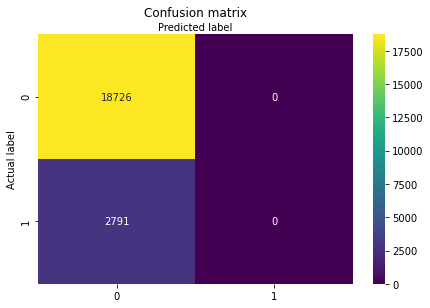

In [50]:
fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')